# Índice

### Cápitulo 1: Análise Exploratória de Dados
- 1.1: Importando Dados e Primeiras Visualizações
- 1.2: Verificando Valores Nulos

### Cápitulo 2: Tratamento de Dados
- 2.1: Atribuindo ID's para Restaurants
- 2.2: Criando Colunas 
- 2.3: Extração de "Cidade" e "País"
- 2.4: Tratando Valores Nulos
- 2.5: Processando Coluna de Serviços


### Cápitulo 3: Visualizações
- 3.1: Distribuição dos Prêmios Michelin 
- 3.2: Localizações com Mais Restaurantes
- 3.3: Culinárias mais Populares

# Cápitulo 1: Análise Exploratória de Dados

Nesta seção, analisamos de perto nossos dados para entender o que eles podem nos dizer.

Esta etapa é crucial para conhecermos melhor nossos dados.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

### 1.1: Importando Dados e Primeira Visualização

In [51]:
# Ler o arquivo CSV 'michelin_my_maps.csv' e armazenando os dados no DataFrame df_bruto
df_bruto = pd.read_csv("michelin_my_maps.csv")
# Exibir o DataFrame df_bruto para verificar os dados
df_bruto

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Description
0,Taian,"1-21-2 Shimanouchi, Chuo-ku, Osaka, 542-0082, ...","Osaka, Japan",¥¥¥,Japanese,135.507205,34.673353,8.166120e+10,https://guide.michelin.com/en/osaka-region/osa...,NaN,3 Stars,"Air conditioning,Counter dining",Cuisine that does not change does not improve....
1,Hyotei,"35 Nanzenji Kusagawacho, Sakyo-ku, Kyoto, 606-...","Kyoto, Japan",¥¥¥¥,Japanese,135.786742,35.011355,8.175771e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://hyotei.co.jp/,3 Stars,"Air conditioning,Car park,Shoes must be removed",This traditional restaurant began its 450-year...
2,HAJIME,"1-9-11 Edobori, Nishi-ku, Osaka, 550-0002, Japan","Osaka, Japan",¥¥¥¥,Innovative,135.496084,34.688612,8.166448e+10,https://guide.michelin.com/en/osaka-region/osa...,http://www.hajime-artistes.com/,3 Stars,"Air conditioning,Interesting wine list,Restaur...",An artwork resembling a planet dominates the d...
3,Kikunoi Honten,"459 Shimokawaracho, Higashiyama-ku, Kyoto, 605...","Kyoto, Japan",¥¥¥¥,Japanese,135.782079,35.001535,8.175561e+10,https://guide.michelin.com/en/kyoto-region/kyo...,https://kikunoi.jp/,3 Stars,"Air conditioning,Car park,Shoes must be removed",The elegant garden and well-appointed ceremoni...
4,Isshisoden Nakamura,"136 Matsushitacho, Nakagyo-ku, Kyoto, 604-8093...","Kyoto, Japan",¥¥¥¥,Japanese,135.765083,35.010397,8.175222e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://www.kyoryori-nakamura.com/,3 Stars,"Air conditioning,Shoes must be removed",Isshisoden Nakamura started out as a business ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,Barú Marisquería,"Rua Augusta 2542, São Paulo, 01412-100, Brazil","São Paulo, Brazil",$$,Seafood,-46.665559,-23.563003,5.511306e+11,https://guide.michelin.com/en/sao-paulo-region...,http://www.barumarisqueria.com/,Bib Gourmand,"Air conditioning,Terrace,Valet parking",This small restaurant with an attractive and r...
6696,Ecully Gastronomia,"Rua Cotoxó 493, São Paulo, 05021-000, Brazil","São Paulo, Brazil",$$,International,-46.684270,-23.531480,5.511385e+11,https://guide.michelin.com/en/sao-paulo-region...,https://www.ecully.com.br/,Bib Gourmand,"Air conditioning,Interesting wine list,Terrace...",Tables here are set out on the old patio amid ...
6697,A Casa do Porco,"Rua Araujo 124, São Paulo, 01220-020, Brazil","São Paulo, Brazil",$$,"Brazilian, Pork",-46.644742,-23.544867,5.511326e+11,https://guide.michelin.com/en/sao-paulo-region...,https://acasadoporco.com.br/,Bib Gourmand,"Air conditioning,Reservations not accepted,Ter...","Enjoy pork at its best! Chef Jefferson Rueda, ..."
6698,Bistrot de Paris,"Rua Augusta 2542, São Paulo, 01412-100, Brazil","São Paulo, Brazil",$$,French,-46.665678,-23.562928,5.511306e+11,https://guide.michelin.com/en/sao-paulo-region...,https://bistrotdeparis.com.br/,Bib Gourmand,"Air conditioning,Terrace,Valet parking,Wheelch...",Sitting out on the front terrace of this resta...


Ao visualizar os dados, percebemos imediatamente que os restaurantes não possuem ID, um elemento crucial para o nosso projeto. As colunas 'Award' e 'Price' serão mais fáceis de manipular se essas informações estiverem em formato numérico simples, portanto, criaremos novas colunas para isso. Também será necessário processar a coluna "FacilitiesAndServices" para que possamos selecionar, de forma independente, cada um dos serviços disponibilizados pelos restaurantes em nosso dashboard.

In [52]:
# Verificar os tipos de dados de cada coluna no DataFrame df_bruto
df_bruto.dtypes

Name                      object
Address                   object
Location                  object
Price                     object
Cuisine                   object
Longitude                float64
Latitude                 float64
PhoneNumber              float64
Url                       object
WebsiteUrl                object
Award                     object
FacilitiesAndServices     object
Description               object
dtype: object

### 1.2: Verificando Valores Nulos

In [53]:
# Verificar a contagem de valores nulos para cada coluna no DataFrame df_bruto
df_bruto.isnull().sum()

Name                        0
Address                     0
Location                    0
Price                       2
Cuisine                     0
Longitude                   0
Latitude                    0
PhoneNumber               163
Url                         0
WebsiteUrl               1185
Award                       0
FacilitiesAndServices     243
Description                 1
dtype: int64

Na coluna "Price" existem 2 valores que deverão ser tratados, para não comprometer a criação do card, contendo a média de valores de determinada região. 
Na coluna "FaciliesAndServices", existem 243 valores, que serão tratados no futuro, para que a coluna mostre as informações separadamente. "PhoneNumber", "WebsiteUrl" e "Description" dispensam tratamento pois não irão aparecer em nosso Dashboard.

In [54]:
# Verificar linhas com valores nulos na coluna 'Preço'
linhas_preco_nulo = df_bruto[df_bruto['Price'].isnull()]

# Exibir apenas a coluna 'Localização' dessas linhas
localizacoes_preco_nulo = linhas_preco_nulo['Location']

# Resultados
print("Localizações com valores nulos na coluna 'Preço':")
print(localizacoes_preco_nulo)

Localizações com valores nulos na coluna 'Preço':
5828    Bülach, Switzerland
6667      São Paulo, Brazil
Name: Location, dtype: object


# Cápitulo 2: Tratamento de Dados

In [55]:
# Criar uma cópia do DataFrame df_bruto e atribui à variável michelin_df
michelin_df = df_bruto.copy()

### 2.1: Atribuindo ID's para Restaurants

In [56]:
def adicionar_id(df, id_col_name='RestaurantID'):
    # Adicionar a coluna de ID
    df[id_col_name] = range(len(df))
    
    # Reorganizar as colunas para que a coluna de ID seja a primeira
    df = df[[id_col_name] + [col for col in df.columns if col != id_col_name]]
    
    return df

In [57]:
# Chamar a função adicionar_id() para adicionar um identificador único a cada linha do DataFrame michelin_df
michelin_df = adicionar_id(michelin_df)

### 2.2: Criando Colunas 

In [58]:
# Adicionar uma nova coluna 'Price_Length' ao DataFrame michelin_df que contém o comprimento de cada valor na coluna 'Price'
michelin_df['Price_Length'] = michelin_df['Price'].astype(str).apply(lambda x: len(x))

# Visualizar o DataFrame com as informações de formato de preço
print(michelin_df[['Price', 'Price_Length']])

     Price  Price_Length
0      ¥¥¥             3
1     ¥¥¥¥             4
2     ¥¥¥¥             4
3     ¥¥¥¥             4
4     ¥¥¥¥             4
...    ...           ...
6695    $$             2
6696    $$             2
6697    $$             2
6698    $$             2
6699     $             1

[6700 rows x 2 columns]


In [59]:
# Extrair os números da coluna 'Award' e criar uma nova coluna 'Stars'
michelin_df['Stars'] = michelin_df['Award'].str.extract('(\d+)').fillna(0).astype(int)
# Visualizar o o DataFrame com as informações de formato de preço
print(michelin_df[['Award', 'Stars']])

             Award  Stars
0          3 Stars      3
1          3 Stars      3
2          3 Stars      3
3          3 Stars      3
4          3 Stars      3
...            ...    ...
6695  Bib Gourmand      0
6696  Bib Gourmand      0
6697  Bib Gourmand      0
6698  Bib Gourmand      0
6699  Bib Gourmand      0

[6700 rows x 2 columns]


### 2.3: Extração de Cidade e País

In [60]:
def dividir_localizacao(df, location_col='Location'):
    # Verificar se a coluna de localização existe no DataFrame
    if location_col not in df.columns:
        raise ValueError(f"A coluna '{location_col}' não existe no DataFrame.")
    
    # Aplicar as funções lambda para extrair 'City' e 'Country'
    df['City'] = df[location_col].apply(lambda x: x.split(',')[0].strip())
    df['Country'] = df[location_col].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else '')
    
    return df

In [61]:
# Chamar a função dividir_localizacao() para dividir a coluna 'Location' em colunas separadas de 'City' e 'Country' no DataFrame michelin_df
michelin_df = dividir_localizacao(michelin_df)
michelin_df.head()

,RestaurantID,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Description,Price_Length,Stars,City,Country
0,0,Taian,"1-21-2 Shimanouchi, Chuo-ku, Osaka, 542-0082, ...","Osaka, Japan",¥¥¥,Japanese,135.507205,34.673353,8.166120e+10,https://guide.michelin.com/en/osaka-region/osa...,NaN,3 Stars,"Air conditioning,Counter dining",Cuisine that does not change does not improve....,3,3,Osaka,Japan
1,1,Hyotei,"35 Nanzenji Kusagawacho, Sakyo-ku, Kyoto, 606-...","Kyoto, Japan",¥¥¥¥,Japanese,135.786742,35.011355,8.175771e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://hyotei.co.jp/,3 Stars,"Air conditioning,Car park,Shoes must be removed",This traditional restaurant began its 450-year...,4,3,Kyoto,Japan
2,2,HAJIME,"1-9-11 Edobori, Nishi-ku, Osaka, 550-0002, Japan","Osaka, Japan",¥¥¥¥,Innovative,135.496084,34.688612,8.166448e+10,https://guide.michelin.com/en/osaka-region/osa...,http://www.hajime-artistes.com/,3 Stars,"Air conditioning,Interesting wine list,Restaur...",An artwork resembling a planet dominates the d...,4,3,Osaka,Japan
3,3,Kikunoi Honten,"459 Shimokawaracho, Higashiyama-ku, Kyoto, 605...","Kyoto, Japan",¥¥¥¥,Japanese,135.782079,35.001535,8.175561e+10,https://guide.michelin.com/en/kyoto-region/kyo...,https://kikunoi.jp/,3 Stars,"Air conditioning,Car park,Shoes must be removed",The elegant garden and well-appointed ceremoni...,4,3,Kyoto,Japan
4,4,Isshisoden Nakamura,"136 Matsushitacho, Nakagyo-ku, Kyoto, 604-8093...","Kyoto, Japan",¥¥¥¥,Japanese,135.765083,35.010397,8.175222e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://www.kyoryori-nakamura.com/,3 Stars,"Air conditioning,Shoes must be removed",Isshisoden Nakamura started out as a business ...,4,3,Kyoto,Japan


In [62]:
def atualizar_country(df, city_col='City', country_col='Country', city_to_country=None):
    # Verificar se a coluna existe no DataFrame
    if city_to_country is None:
        raise ValueError("O dicionário 'city_to_country' não pode ser None.")
    
    # Aplicar a correspondência
    df[country_col] = df.apply(
        lambda row: city_to_country.get(row[city_col], row[country_col]),
        axis=1
    )
    
    return df

In [63]:
# Criar o dicionário city_to_country
city_to_country = {
    'Abu Dhabi': 'United Arab Emirates',
    'Dubai': 'United Arab Emirates',
    'Hong Kong': 'Hong Kong',
    'Luxembourg': 'Luxembourg',
    'Macau': 'Macau',
    'Singapore': 'Singapore'
}

# Utilizar a função atualizar_country com as cidades definidas em city_to_country
michelin_df = atualizar_country(michelin_df, city_to_country=city_to_country)

# Verificar o resultado
michelin_df.head()

,RestaurantID,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Description,Price_Length,Stars,City,Country
0,0,Taian,"1-21-2 Shimanouchi, Chuo-ku, Osaka, 542-0082, ...","Osaka, Japan",¥¥¥,Japanese,135.507205,34.673353,8.166120e+10,https://guide.michelin.com/en/osaka-region/osa...,NaN,3 Stars,"Air conditioning,Counter dining",Cuisine that does not change does not improve....,3,3,Osaka,Japan
1,1,Hyotei,"35 Nanzenji Kusagawacho, Sakyo-ku, Kyoto, 606-...","Kyoto, Japan",¥¥¥¥,Japanese,135.786742,35.011355,8.175771e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://hyotei.co.jp/,3 Stars,"Air conditioning,Car park,Shoes must be removed",This traditional restaurant began its 450-year...,4,3,Kyoto,Japan
2,2,HAJIME,"1-9-11 Edobori, Nishi-ku, Osaka, 550-0002, Japan","Osaka, Japan",¥¥¥¥,Innovative,135.496084,34.688612,8.166448e+10,https://guide.michelin.com/en/osaka-region/osa...,http://www.hajime-artistes.com/,3 Stars,"Air conditioning,Interesting wine list,Restaur...",An artwork resembling a planet dominates the d...,4,3,Osaka,Japan
3,3,Kikunoi Honten,"459 Shimokawaracho, Higashiyama-ku, Kyoto, 605...","Kyoto, Japan",¥¥¥¥,Japanese,135.782079,35.001535,8.175561e+10,https://guide.michelin.com/en/kyoto-region/kyo...,https://kikunoi.jp/,3 Stars,"Air conditioning,Car park,Shoes must be removed",The elegant garden and well-appointed ceremoni...,4,3,Kyoto,Japan
4,4,Isshisoden Nakamura,"136 Matsushitacho, Nakagyo-ku, Kyoto, 604-8093...","Kyoto, Japan",¥¥¥¥,Japanese,135.765083,35.010397,8.175222e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://www.kyoryori-nakamura.com/,3 Stars,"Air conditioning,Shoes must be removed",Isshisoden Nakamura started out as a business ...,4,3,Kyoto,Japan


### 2.4: Tratando Valores Nulos

In [65]:
def calcular_tamanho_medio_preco(df, paises):
    # Filtrar o DataFrame para os países especificados
    filtered_df = df[df['Country'].isin(paises)]
    
    # Calcular a média de Price_Length para cada país e arredondar para números inteiros
    mean_price_length = filtered_df.groupby('Country')['Price_Length'].mean().round()
    
    return mean_price_length

In [66]:
# Usar a função para os países Brazil e Switzerland
paises = ['Brazil', 'Switzerland']
calcular_tamanho_medio_preco(michelin_df, paises)
michelin_df.head()

,RestaurantID,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Description,Price_Length,Stars,City,Country
0,0,Taian,"1-21-2 Shimanouchi, Chuo-ku, Osaka, 542-0082, ...","Osaka, Japan",¥¥¥,Japanese,135.507205,34.673353,8.166120e+10,https://guide.michelin.com/en/osaka-region/osa...,NaN,3 Stars,"Air conditioning,Counter dining",Cuisine that does not change does not improve....,3,3,Osaka,Japan
1,1,Hyotei,"35 Nanzenji Kusagawacho, Sakyo-ku, Kyoto, 606-...","Kyoto, Japan",¥¥¥¥,Japanese,135.786742,35.011355,8.175771e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://hyotei.co.jp/,3 Stars,"Air conditioning,Car park,Shoes must be removed",This traditional restaurant began its 450-year...,4,3,Kyoto,Japan
2,2,HAJIME,"1-9-11 Edobori, Nishi-ku, Osaka, 550-0002, Japan","Osaka, Japan",¥¥¥¥,Innovative,135.496084,34.688612,8.166448e+10,https://guide.michelin.com/en/osaka-region/osa...,http://www.hajime-artistes.com/,3 Stars,"Air conditioning,Interesting wine list,Restaur...",An artwork resembling a planet dominates the d...,4,3,Osaka,Japan
3,3,Kikunoi Honten,"459 Shimokawaracho, Higashiyama-ku, Kyoto, 605...","Kyoto, Japan",¥¥¥¥,Japanese,135.782079,35.001535,8.175561e+10,https://guide.michelin.com/en/kyoto-region/kyo...,https://kikunoi.jp/,3 Stars,"Air conditioning,Car park,Shoes must be removed",The elegant garden and well-appointed ceremoni...,4,3,Kyoto,Japan
4,4,Isshisoden Nakamura,"136 Matsushitacho, Nakagyo-ku, Kyoto, 604-8093...","Kyoto, Japan",¥¥¥¥,Japanese,135.765083,35.010397,8.175222e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://www.kyoryori-nakamura.com/,3 Stars,"Air conditioning,Shoes must be removed",Isshisoden Nakamura started out as a business ...,4,3,Kyoto,Japan


In [67]:
# Filtrar o DataFrame para Brazil e Switzerland
df_filtrado = michelin_df[michelin_df['Country'].isin(['Brazil', 'Switzerland'])]

# Calcular a média de Price_Length para cada localização e arredondar para números inteiros
media_tamanho_preco = df_filtrado.groupby('Country')['Price_Length'].mean().round()

print(media_tamanho_preco)

Country
Brazil         2.0
Switzerland    3.0
Name: Price_Length, dtype: float64


In [68]:
# Substituir os valores vazios na coluna 'Price' com base na localização
michelin_df.loc[michelin_df['Location'].str.contains('Brazil') & michelin_df['Price'].isnull(), 'Price'] = '$$'
michelin_df.loc[michelin_df['Location'].str.contains('Switzerland') & michelin_df['Price'].isnull(), 'Price'] = '€€€'

### 2.5: Processando Coluna de Serviços

In [69]:
def processar_coluna(df, coluna):
    # Separar as características pelo delimitador ','
    df[coluna] = df[coluna].str.split(',')

    # Transformar as listas em linhas
    df = df.explode(coluna)

    # Remover espaços em branco no início e no fim das strings na coluna
    df[coluna] = df[coluna].str.strip()
    
    return df

In [70]:
# Utilizar a função processar_coluna nas colunas FacilitiesAndServices e Cuisine
michelin_df = processar_coluna(michelin_df, 'FacilitiesAndServices')
michelin_df = processar_coluna(michelin_df, 'Cuisine')

michelin_df.head()

,RestaurantID,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Description,Price_Length,Stars,City,Country
0,0,Taian,"1-21-2 Shimanouchi, Chuo-ku, Osaka, 542-0082, ...","Osaka, Japan",¥¥¥,Japanese,135.507205,34.673353,8.166120e+10,https://guide.michelin.com/en/osaka-region/osa...,NaN,3 Stars,Air conditioning,Cuisine that does not change does not improve....,3,3,Osaka,Japan
0,0,Taian,"1-21-2 Shimanouchi, Chuo-ku, Osaka, 542-0082, ...","Osaka, Japan",¥¥¥,Japanese,135.507205,34.673353,8.166120e+10,https://guide.michelin.com/en/osaka-region/osa...,NaN,3 Stars,Counter dining,Cuisine that does not change does not improve....,3,3,Osaka,Japan
1,1,Hyotei,"35 Nanzenji Kusagawacho, Sakyo-ku, Kyoto, 606-...","Kyoto, Japan",¥¥¥¥,Japanese,135.786742,35.011355,8.175771e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://hyotei.co.jp/,3 Stars,Air conditioning,This traditional restaurant began its 450-year...,4,3,Kyoto,Japan
1,1,Hyotei,"35 Nanzenji Kusagawacho, Sakyo-ku, Kyoto, 606-...","Kyoto, Japan",¥¥¥¥,Japanese,135.786742,35.011355,8.175771e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://hyotei.co.jp/,3 Stars,Car park,This traditional restaurant began its 450-year...,4,3,Kyoto,Japan
1,1,Hyotei,"35 Nanzenji Kusagawacho, Sakyo-ku, Kyoto, 606-...","Kyoto, Japan",¥¥¥¥,Japanese,135.786742,35.011355,8.175771e+10,https://guide.michelin.com/en/kyoto-region/kyo...,http://hyotei.co.jp/,3 Stars,Shoes must be removed,This traditional restaurant began its 450-year...,4,3,Kyoto,Japan


# Cápitulo 3: Visualizações

A seguir, algumas visualizações serão apresentadas destacando os principais insights sobre os restaurantes Michelin. Optei por focar nas visualizações mais relevantes e generalizadas, uma vez que o dashboard inclui um mapa que permite uma análise detalhada dos dados para quem deseja obter insights mais específicos.

### 3.1: Distribuição dos Prêmios Michelin 

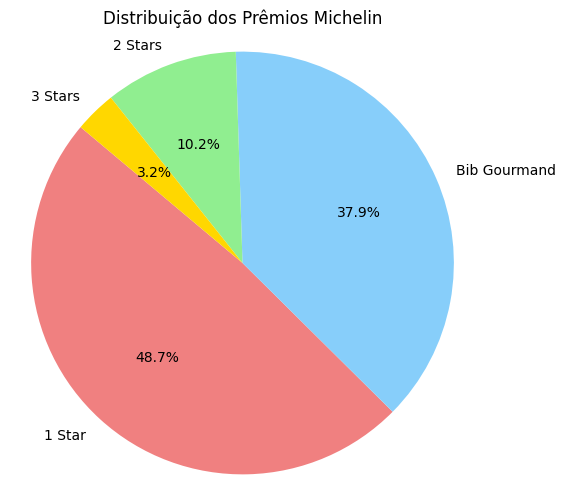

In [71]:
# Contagem de ocorrências de cada tipo de prêmio
contagens = michelin_df['Award'].value_counts()

# Extrair rótulos e contagens
rotulos = contagens.index
tamanhos = contagens.values

# Cores personalizadas para cada fatia do gráfico
cores = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']

# Criar o gráfico de pizza com cores personalizadas
plt.figure(figsize=(6, 6))
plt.pie(tamanhos, labels=rotulos, autopct='%1.1f%%', startangle=140, colors=cores)
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo

# Adicionar título
plt.title('Distribuição dos Prêmios Michelin')

# # Salvar o gráfico em um arquivo PNG
# plt.savefig('distribuicao_premios_michelin.png')

# Mostrar o gráfico
plt.show()

### 3.2: Localizações com Mais Restaurantes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12812\518986937.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=restaurantes_por_cidade.index, y=restaurantes_por_cidade.values, palette='viridis')


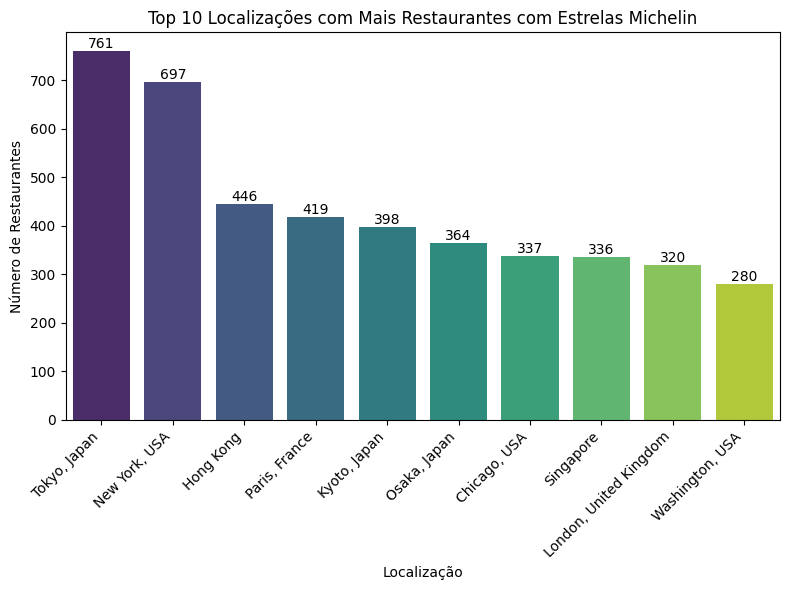

In [72]:
# Contar o número de restaurantes por cidade
restaurantes_por_cidade = michelin_df['Location'].value_counts().head(10)

# Criar o gráfico de barras com uma paleta de cores em degradê
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=restaurantes_por_cidade.index, y=restaurantes_por_cidade.values, palette='viridis')
plt.title('Top 10 Localizações com Mais Restaurantes com Estrelas Michelin')
plt.xlabel('Localização')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para facilitar a leitura

# Adicionar o número exato de restaurantes em cima de cada barra
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()

# # Salvar o gráfico em um arquivo PNG
# plt.savefig('localizacoes_michelin.png')

plt.show()

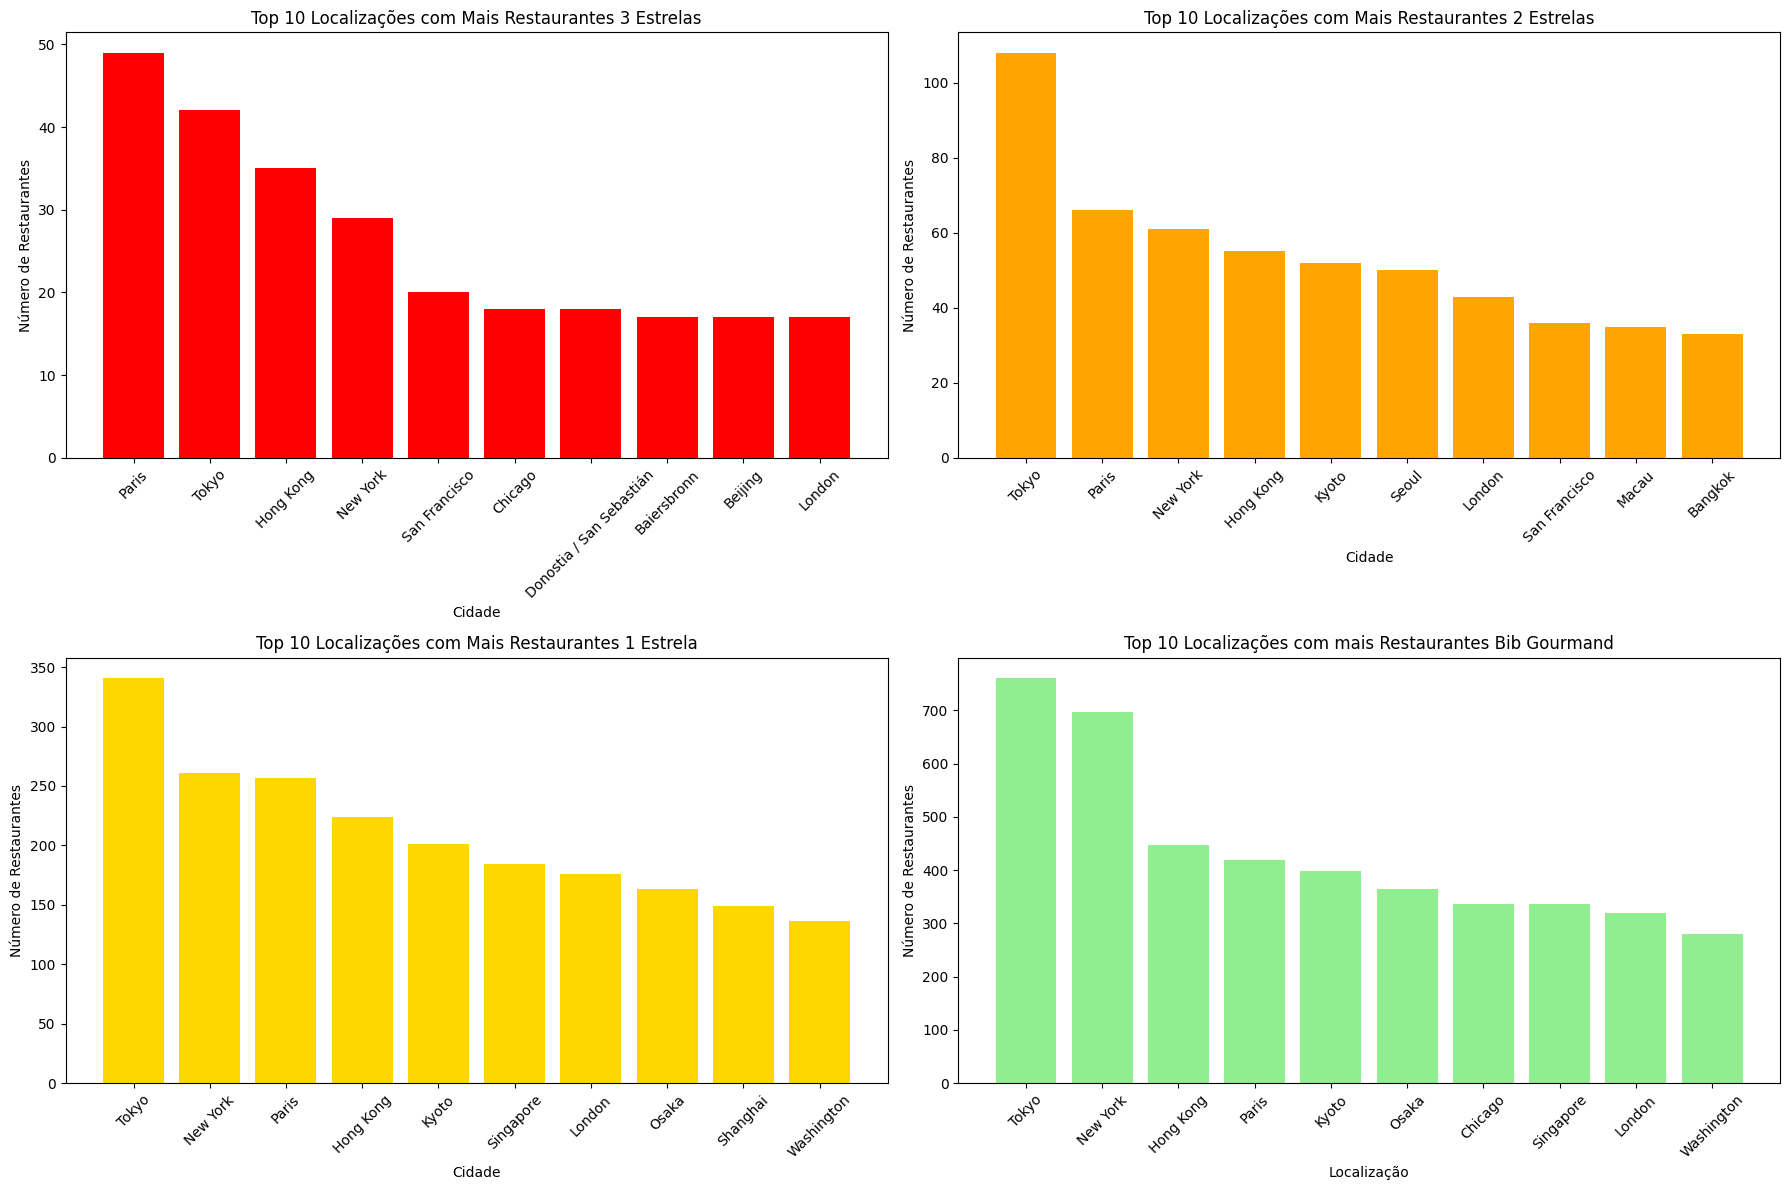

In [73]:
# Agrupar os dados por cidade e contar o número de restaurantes em cada categoria de estrelas
restaurantes_por_cidade = michelin_df.groupby(['City', 'Stars']).size().unstack(fill_value=0)

# Selecionar apenas o top 10 de cidades com mais restaurantes em cada categoria de estrelas
top_10_3_estrelas = restaurantes_por_cidade[3].nlargest(10)
top_10_2_estrelas = restaurantes_por_cidade[2].nlargest(10)
top_10_1_estrela = restaurantes_por_cidade[1].nlargest(10)

# Contagem de restaurantes Bib Gourmand por país e cidade
top_cities = michelin_df['City'].value_counts().head(10)

# Criar um layout de 2x2 para os gráficos
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico de barras para os restaurantes 3 estrelas
axs[0, 0].bar(top_10_3_estrelas.index, top_10_3_estrelas.values, color='red')
axs[0, 0].set_title('Top 10 Localizações com Mais Restaurantes 3 Estrelas')
axs[0, 0].set_xlabel('Cidade')
axs[0, 0].set_ylabel('Número de Restaurantes')
axs[0, 0].tick_params(axis='x', rotation=45)

# Gráfico de barras para os restaurantes 2 estrelas
axs[0, 1].bar(top_10_2_estrelas.index, top_10_2_estrelas.values, color='orange')
axs[0, 1].set_title('Top 10 Localizações com Mais Restaurantes 2 Estrelas')
axs[0, 1].set_xlabel('Cidade')
axs[0, 1].set_ylabel('Número de Restaurantes')
axs[0, 1].tick_params(axis='x', rotation=45)

# Gráfico de barras para os restaurantes 1 estrela
axs[1, 0].bar(top_10_1_estrela.index, top_10_1_estrela.values, color='gold')
axs[1, 0].set_title('Top 10 Localizações com Mais Restaurantes 1 Estrela')
axs[1, 0].set_xlabel('Cidade')
axs[1, 0].set_ylabel('Número de Restaurantes')
axs[1, 0].tick_params(axis='x', rotation=45)

# Gráfico de barras para os restaurantes Bib Gourmand
axs[1, 1].bar(top_cities.index, top_cities.values, color='lightgreen')
axs[1, 1].set_title('Top 10 Localizações com mais Restaurantes Bib Gourmand')
axs[1, 1].set_xlabel('Localização')
axs[1, 1].set_ylabel('Número de Restaurantes')
axs[1, 1].tick_params(axis='x', rotation=45)

# Ajustar o layout
plt.tight_layout()

# # Salvar o gráfico em um arquivo PNG
# plt.savefig('restaurantes_cidade_michelin.png')

plt.show()

### 3.3: Culinárias mais Populares

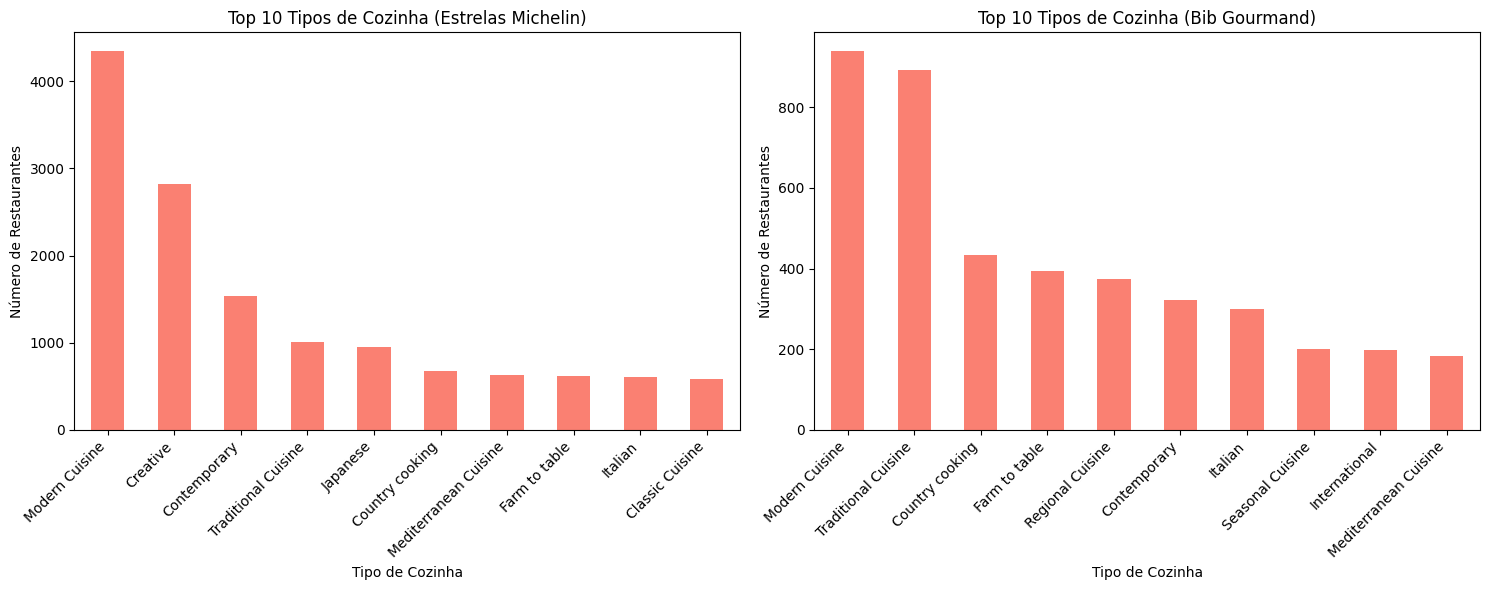

In [74]:
# Contagem de tipos de cozinha para todos os restaurantes
top_cuisines_all = michelin_df['Cuisine'].value_counts().head(10)

# Plotar gráfico de barras para os top tipos de cozinha nos restaurantes com estrelas Michelin
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
top_cuisines_all.plot(kind='bar', color='salmon')
plt.title('Top 10 Tipos de Cozinha (Estrelas Michelin)')
plt.xlabel('Tipo de Cozinha')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45, ha='right')

# Filtrar apenas os restaurantes que receberam o prêmio Bib Gourmand
bib_gourmand_df = michelin_df[michelin_df['Award'] == 'Bib Gourmand']

# Contagem de tipos de cozinha nos restaurantes Bib Gourmand
top_cuisines_bib_gourmand = bib_gourmand_df['Cuisine'].value_counts().head(10)

# Plotar gráfico de barras para os top tipos de cozinha nos restaurantes Bib Gourmand
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
top_cuisines_bib_gourmand.plot(kind='bar', color='salmon')
plt.title('Top 10 Tipos de Cozinha (Bib Gourmand)')
plt.xlabel('Tipo de Cozinha')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# # Salvar o gráfico em um arquivo PNG
# plt.savefig('culinarias_michelin.png')

plt.show()
